# **Name: Abdulrahman Ashour Kamel**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Loding Data

In [2]:
url = "http://bit.ly/w-data"
data_df = pd.read_csv(url)
data_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting the Relation

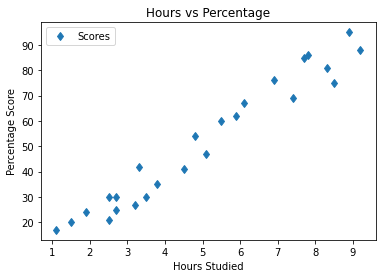

In [3]:
data_df.plot(x='Hours', y='Scores', style='d')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preparation

In [4]:
train_df=data_df["Hours"]
train_df

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [5]:
target_df=data_df["Scores"]
target_df

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

# Models Training

## Model #1 : Simple Linear Regression

In [6]:
x_train,x_test,y_train,y_test=train_test_split(train_df,target_df,test_size=0.31,random_state=1)

In [7]:
model= LinearRegression()

In [8]:
model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [9]:
model.score(x_train.values.reshape(-1,1),y_train)

0.9681980033905908

In [10]:
Ypredicted= model.predict(x_test.values.reshape(-1,1))

### Evaluating Model #1

In [11]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, Ypredicted))

Mean squared error: 56.09


In [12]:
print("Coefficient of determination: %.2f" % r2_score(y_test, Ypredicted))

Coefficient of determination: 0.89


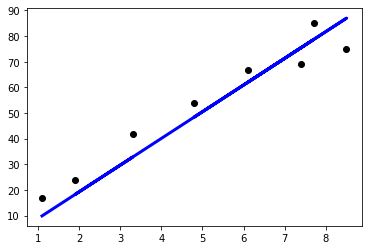

In [13]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, Ypredicted, color="blue", linewidth=3)

### Comparing Actual vs Predicted

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Ypredicted})  
df 

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


## Model #2 : Polynomial Regression

In [15]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [16]:
poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))

In [17]:
poly_reg_model = LinearRegression()

In [18]:
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [19]:
poly_reg_model.score(poly_features, y_train)

0.9827190721791937

In [20]:
x_test_poly = poly.fit_transform(x_test.values.reshape(-1, 1))

In [21]:
y_poly_predicted = poly_reg_model.predict(x_test_poly)

In [22]:
y_poly_predicted

array([23.42950069, 29.88029858, 22.19368724, 88.29665857, 46.96394887,
       82.66798548, 64.36493193, 79.81680495])

### Evaluating Model #2

In [23]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_poly_predicted))

Mean squared error: 68.40


In [24]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_poly_predicted))

Coefficient of determination: 0.87


### Comparing Actual vs Predicted

In [25]:
df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_poly_predicted})  
df_2

,Actual,Predicted
14,17,23.429501
13,42,29.880299
17,24,22.193687
3,75,88.296659
21,54,46.963949
10,85,82.667985
18,67,64.364932
19,69,79.816805


# The Predicted Score if a student studys for 9.25 hours/day

## Using Model #1

In [26]:
hours_df = pd.DataFrame({'hours': [9.25]})
own_pred = model.predict(hours_df)
print("No of Hours = {}".format(hours_df.iloc[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = hours    9.25
Name: 0, dtype: float64
Predicted Score = 94.78722212956563


## Using Model #2

In [27]:
hours_df2 = pd.DataFrame({'hours': [9.25]})
hours_poly = poly.fit_transform(hours_df2.values.reshape(-1, 1))
own_pred2 = poly_reg_model.predict(hours_poly)
print("No of Hours = {}".format(hours_df2.iloc[0]))
print("Predicted Score = {}".format(own_pred2[0]))

No of Hours = hours    9.25
Name: 0, dtype: float64
Predicted Score = 90.28875576049808
